### Potrebne biblioteke i učitavanje podataka

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("toy_dataset.csv")
df.head(5)

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


# Eksplorativna analiza podataka

Jedan od ciljeva eksplorativne analize je "pročistiti" dan skup podataka kako bi mogli napraviti bolji predikcijski model.

Koraci čišćenja skupa podataka:

1.   Brisanje redova koji sadrže missing/null values.
2.   Brisanje identičnih redova (duplića).
3.   Brisanje nepotrebnih stupaca.
4.   Brisanje atributa koji su međusobno visoko korelirani.
5.   Brisanje outlier-a.

## Upoznavanje sa skupom podataka

Prije čišćenja skupa podataka, valja se upoznati sa učitanim skupom podataka (osnovne stvari poput veličine uzorka, tipove podataka, prosječna vrijednost/medijan/std.devijacija svakog atributa, provjera sadrži li tablica missing values)

In [ ]:
# Provjera oblika skupa podataka
df.shape

(150000, 6)

In [ ]:
# Provjera tipova podataka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [ ]:
# Sazetak statističkih obilježja skupa podataka
df.describe()
# Napomena za kasnije: stupac Number nam nije bitan i možemo ga maknuti

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [ ]:
# Broj zdravih i broj bolesnih ljudi
df.Illness.value_counts()

No     137861
Yes     12139
Name: Illness, dtype: int64

## Čišćenje tablice

In [ ]:
# Provjera postoji li missing values ili null values
print(df.isnull().sum())

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


In [ ]:
# Provjera postoje li retci s identičnim podacima
duplicate_rows_df = df[df.duplicated()]
print("Broj duplića:", duplicate_rows_df.shape)

Broj duplića: (0, 6)


In [3]:
# Micanje bespotrebnih stupaca (konkretno, "Number" stupac)
df = df.drop("Number", axis=1)
df.head(5)

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


## Upoznajmo dan skup podataka kroz par grafova

### Pogledajmo distribuciju svakih od atributa u odnosu na ciljni atribut `bolest`.

Počnimo s jednostavnim grafom koji prikazuje frekvenciju zdravih i bolesnih osoba, kako bi otprilike vidjeli njihov omjer.

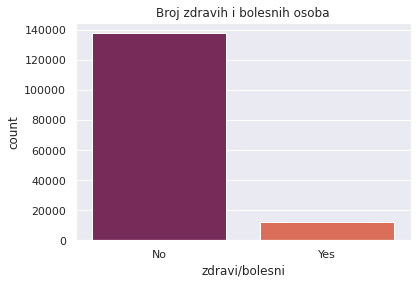

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.countplot(x="Illness", palette="rocket", data=df)
plt.xlabel('zdravi/bolesni')
plt.title("Broj zdravih i bolesnih osoba")
plt.show()

Pogledajmo ima li `spol` utjecaja na to je li osoba zdrava ili bolesna.

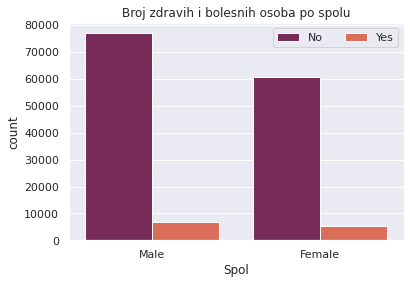

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.countplot(x="Gender",hue='Illness', palette="rocket", data=df)
plt.xlabel('Spol')
plt.title("Broj zdravih i bolesnih osoba po spolu")
plt.legend(loc='best',ncol=2)
plt.show()

***Zaključak***

Omjer zdravih i bolesnih se čini podjednak za svaki `spol`, pa taj atribut nebi trebao imati veliki utjecaj na `bolest`.

Pogledajmo ima li mjesto boravka `grad` utjecaj na to je li osoba zdrava ili ne.

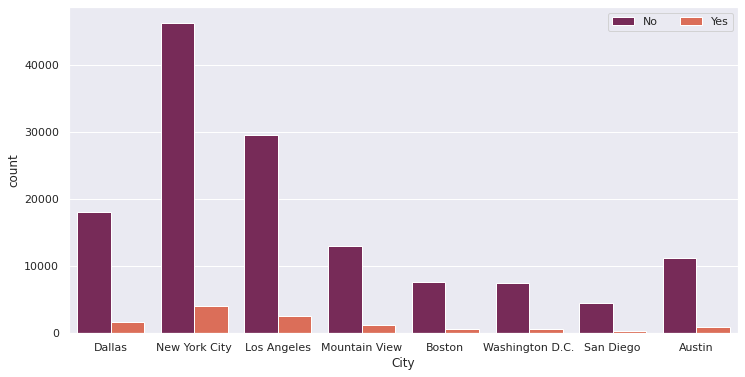

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
sns.countplot(x="City",hue='Illness', palette="rocket", data=df)
plt.legend(loc='best',ncol=2)
plt.show()

***Zaključak***

Isti kao i iznad. Atribut `grad` nebi trebao imati značajan utjecaj na `bolest`.

Nekako smo mogli i prije pretpostaviti da spol i mjesto boravka neće imati značajan utjecaj na bolest svake osobe. Nameće nam se logički da bi utjecaj mogli imati atributi poput `starost` (Age) i `zarada` (Income).

Pogledajmo grafove za spomenute atribute.

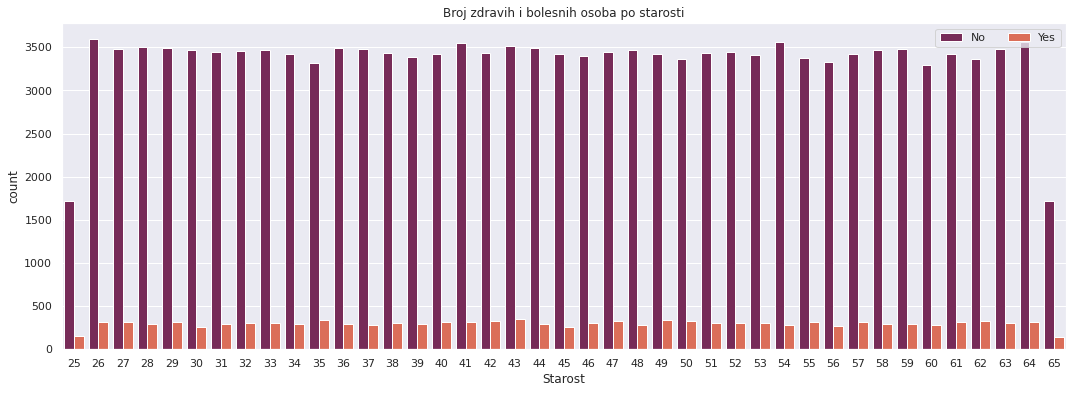

In [ ]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
sns.countplot(x="Age",hue='Illness', palette="rocket", data=df)
plt.xlabel('Starost')
plt.title("Broj zdravih i bolesnih osoba po starosti")
plt.legend(loc='best',ncol=2)
plt.show()

***Zaključak***

Možda i nečekivano, atribut `starost` nema nekakav značajan utjecaj na `bolest`.

Pogledajmo distribuciju `zarada` za zdrave i za bolesne osobe.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


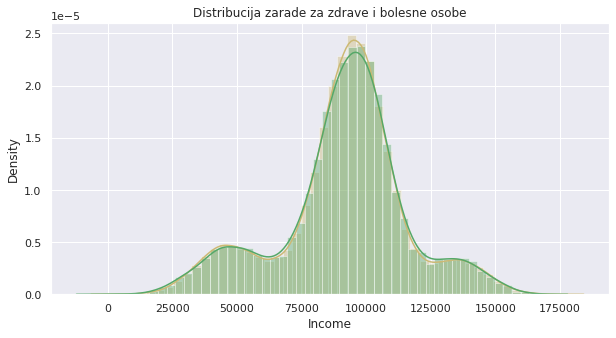

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df[df["Illness"] == "No"]["Income"], color="y")
sns.distplot(df[df["Illness"] == "Yes"]["Income"], color="g")
fig.legend(labels=['No', 'Yes'])
plt.title("Distribucija zarade za zdrave i bolesne osobe")
plt.show()

***Zaključak***

Grafovi su poprilično podjednaki, pa bi mogli zaključiti kako ni `zarada` nema nekakav značajan utjecaj na `bolest`.

In [ ]:
df.head(5)

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


## Provjera outliera u skupu podataka

Želimo li dobiti što bolji ML model, potrebno je maknuti outlier podatke. Možemo ih vidjeti box plot-om.

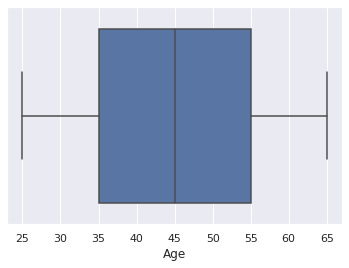

In [ ]:
sns.boxplot(x=df['Age'])

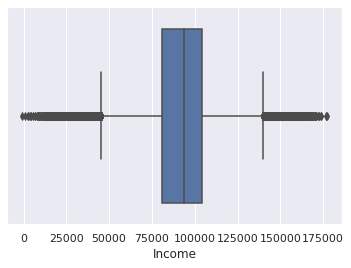

In [ ]:
sns.boxplot(x=df['Income'])

Vidimo outlier točke u kategoriji `zarada` (imamo čak i negativnu zaradu). Maknimo te točke koristeći IQR-score tehniku.

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age          20.00
Income    23651.25
dtype: float64


In [5]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(135217, 5)

Kao što možemo vidjeti, pročistili smo tablicu tako da smo sa 150 000 primjeraka pali na 135 217, dakle otprilike 15 000 primjeraka su bili outlieri. Moguće je da ih imamo još, ali njihov broj je zanemariv u odnosu na broj koje smo izbrisali.

Pogledajmo sada box-plot od `zarada`.

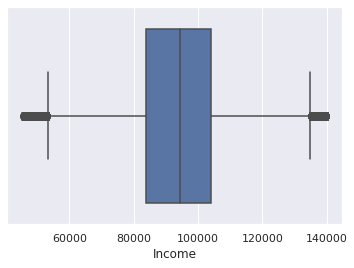

In [6]:
sns.boxplot(x=df['Income'])

Možemo vidjeti da smo veliku većinu outliera maknuli iz skupa podataka.

## Obrada podataka (one-hot encodanje)
Prije računanja matrice korelacije među podacima, potrebno je numerirati sve podatke.

Sve kategorijske atribute poput `spol` i `grad` ćemo one-hot encodati.

### One-hot encodanje podataka

In [7]:
df.head()

,City,Gender,Age,Income,Illness
2,Dallas,Male,42,52483.0,No
4,Dallas,Male,46,50289.0,No
5,Dallas,Female,36,50786.0,No
8,Dallas,Male,51,68667.0,No
9,Dallas,Female,30,50082.0,No


In [ ]:
data_one_hot = pd.get_dummies(df)
data_one_hot.head()

,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,Illness_No,Illness_Yes
2,42,52483.0,0,0,1,0,0,0,0,0,0,1,1,0
4,46,50289.0,0,0,1,0,0,0,0,0,0,1,1,0
5,36,50786.0,0,0,1,0,0,0,0,0,1,0,1,0
8,51,68667.0,0,0,1,0,0,0,0,0,0,1,1,0
9,30,50082.0,0,0,1,0,0,0,0,0,1,0,1,0


### Korelacija među atributima

Pogledajmo postoji li nekakva značajna korelacija među atributima.

Mogli bi računati ručno korelaciju između svih atributa, ali najpraktičnije je izračunati korelacijsku matricu funkcijom `.corr()` i vizualizirati je funkcijom `heatmap`.

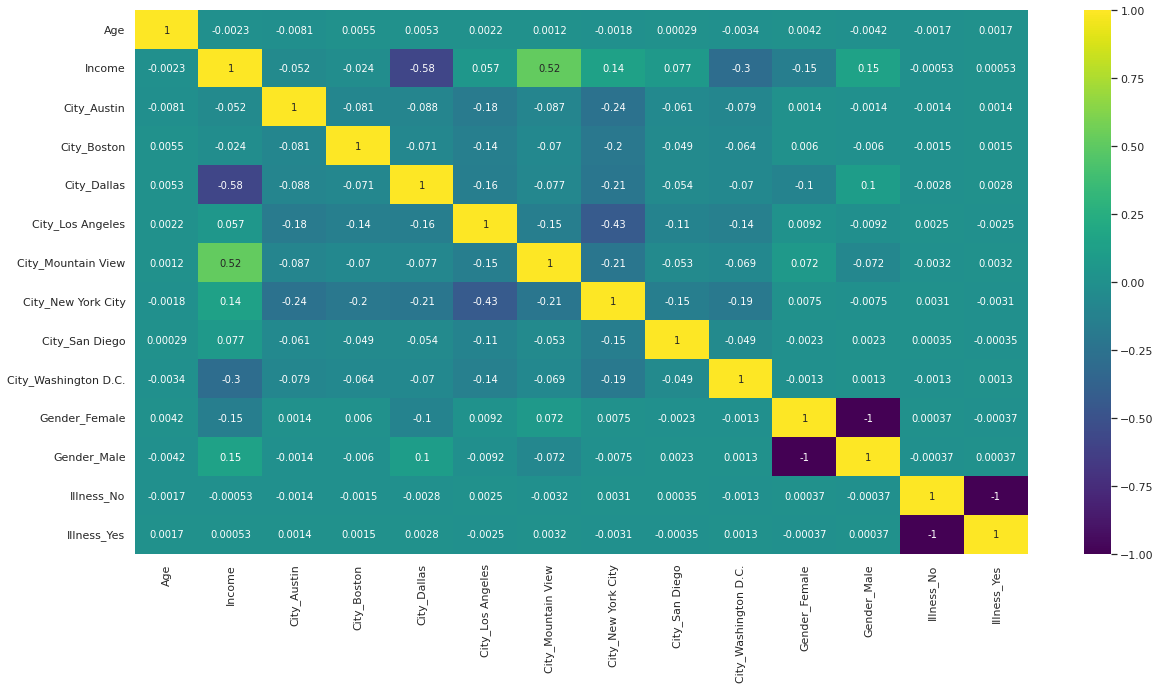

In [ ]:
plt.figure(figsize=(20,10))
c = data_one_hot.corr()
sns.heatmap(c, annot=True, cmap='viridis')

Ne treba gledati korelaciju između iste vrste podataka (primjerice, međusobnu korelaciju gradova ili spola), takva matrica je rezultat one-hod encodanja tablice podataka.

Jedini zapažljivi rezultati su umjerena pozitivna korelacija između grada Mountain View i zarade, te umjerena negativna korelacija između grada Dallas i zarade (ne moramo ih micati iz skupa podataka).

Najbitni rezultat je ustvari korelacija ciljnih atributa Illness_No (zdrava osoba) i Illness_Yes(bolesna osoba) sa ostalim atributima, jer su sve vrijednosti blizu 0. Matrica korelacije pokazuje kako niti jedan atribut ne utječe značajno na to je li osoba zdrava ili bolesna (što smo otprilike i zaključili kada smo gledali grafove ranije).

***Zaključak***

Niti jedan od atributa nije zasebno dobar predikcijski atribut za output `bolest`. Ali, dobar predikcijski atribut ne mora biti onaj koji je koreliran sa ciljnim atributom (korelacija pokazuje samo postoji li nekakav linearan odnos između varijabli, ali ne i njihov utjecaj na ostale varijable). Možemo imati slučaj da varijable zasebno nisu korelirane s ciljnim atributom, ali čija kombinacija jest korelirana s ciljnim atributom.

### Postavlja se pitanje: kako napraviti klasifikator u tom slučaju? Varijable ne ukazuju na nekakvu linearnu vezu (ili bolje rečeno logističku vezu jer radimo s kategorijskim outputom). Možda će neki modeli otkriti nevidljivu vezu među varijablama kao što su slučajne šume i duboki modeli.

## Obrada podataka 2. (normalizacija, razdvajanje na skup za treniranje i skup za testiranje)

Nastavljamo s datasetom df koji nije one-hot encodan i normaliziran. Želimo ga normalizirati jer od skupova podataka s takvim skaliranim vrijednostima dobivamo bolje modele (npr. duboki modeli se treniraju bolje s normaliziranim podacima).

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
df.head(5)

,City,Gender,Age,Income,Illness
2,Dallas,Male,42,52483.0,No
4,Dallas,Male,46,50289.0,No
5,Dallas,Female,36,50786.0,No
8,Dallas,Male,51,68667.0,No
9,Dallas,Female,30,50082.0,No


In [13]:
X_train

,City,Gender,Age,Income
57023,New York City,Female,47,102622.0
139875,Austin,Male,33,83817.0
134221,San Diego,Male,47,100865.0
31145,New York City,Female,35,68442.0
133974,San Diego,Female,63,120262.0
...,...,...,...,...
124960,Washington D.C.,Male,55,63451.0
134662,San Diego,Male,25,102665.0
118385,Boston,Female,40,86719.0
146715,Austin,Male,61,105266.0


In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Kreirajmo transformator stupaca za X

ct = make_column_transformer(
    (MinMaxScaler(), ["Age", "Income"]), # Normalizacija numeričkih podataka
    (OneHotEncoder(handle_unknown="ignore"), ["City", "Gender"]) # One-hot encodanje kategorijskih podataka
)

# X & y
X = df.drop("Illness", axis=1)
y = df["Illness"]

# Skupovi za treniranje i testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fittanje stupac-transformatora na skup za treniranje
ct.fit(X_train)

# Transformacija 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [10]:
y_train = y_train.str.replace("No", "0")
y_train = y_train.str.replace("Yes", "1")

In [11]:
y_test = y_test.str.replace("No", "0")
y_test = y_test.str.replace("Yes", "1")

In [12]:
y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)

# Traženje najboljeg ML modela

## Naivni Bayes

Probajmo prvo s metodom Naivni Bayes. Možemo ju koristiti jer nismo imali značajnu korelaciju (povezanost) između input varijabli, a ta metoda upravo radi pod naivnom pretpostavkom da su input varijable međusobno nezavisne.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(X_train_normal, y_train)
print("score on test: " + str(mnb.score(X_test_normal, y_test)))
print("score on train: "+ str(mnb.score(X_train_normal, y_train)))

score on test: 0.9182073657742937
score on train: 0.9191665202961922


Rezultati na trening skupu i test skupu su skoro identični, pa nemamo problem overfittanja. Dobili smo score od ~92%, no je li to dobro kao što se čini? Podsjetimo se koji je omjer zdravih i bolesnih ljudi.


In [ ]:
df.Illness.value_counts()

No     124261
Yes     10956
Name: Illness, dtype: int64

In [ ]:
(124261)/(124261+10956)

0.9189746851357448

Pogledajmo koliki je omjer u skupu za testiranje.

In [ ]:
y_test.value_counts()

0    24832
1     2212
Name: Illness, dtype: int64

In [ ]:
(24832)/(24832+2212)

0.9182073657742937

Dakle, u skupu za testiranje je ~91.8% ljudi zdravo. Bez ikakve kreacije ML modela za predviđanje mogli bismo za bilo kakav input staviti da je output 0 i dobili bismo preciznost od 91.8%. Može se izvući zaključak da predikcijski model i nije nešto dobar i da želimo model koji ima bolji accuracy od 91.8%. To i možda neće biti lako, ali se postavlja također pitanje da li je accuracy najbolja mjera modela?

S obzirom da je u pitanju bolest, možda želimo neku mjeru koja će nam reći koliko je pozitivnih slučajeva (dakle, bolesnih ljudi) dobro identificirano. Takva mjera je poznata pod imenom Recall kojem je jedan od ciljeva zabilježiti najveći mogući broj pozitivnih slučajeva.

Formula Recalla je: TP/(TP+FN), gdje TP stoji za broj točno predviđenih pozitivnih slučajeva te FN stoji za broj krivo negativno klasificiranih ljudi (dakle, svi bolesni ljudi koje smo klasificirali kao zdrave).

U slučaju da želimo "imitirati" model koji samo izbacuje vrijednost 0 i kao takav će imat accuracy od 91.8%, njegov recall će biti ravan 0 što je indikacija lošeg modela.

Dakle, uz accuracy provjerimo i recall svakog modela.

In [ ]:
y_pred = mnb.predict(X_test_normal)

In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.000


## Algoritam K najbližih susjeda

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train_normal, y_train)
print("train shape: " + str(X_train_normal.shape))
print("score on test: " + str(knn.score(X_test_normal, y_test)))
print("score on train: "+ str(knn.score(X_train_normal, y_train)))

train shape: (108173, 12)
score on test: 0.9137331755657447
score on train: 0.9205254545958789


Dugo vrijeme pokretanja koda i neželjeni rezultat od 91.37%.

Pogledajmo svejedno recall score.

In [ ]:
y_pred = knn.predict(X_test_normal)

In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.009


Iako je model nešto lošiji od ostalih, bar je uspio prepoznati ~1% bolesnih ljudi, za razliku od ostalih modela koji imaju recall 0.

## Slučajne šume

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_normal, y_train)
print("score on test: " + str(rf.score(X_test_normal, y_test)))
print("score on train: "+ str(rf.score(X_train_normal, y_train)))

score on test: 0.8652566188433664
score on train: 0.9990940438002089


In [ ]:
y_pred = rf.predict(X_test_normal)

In [ ]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.063


Score na trening skupu je odličan, ali je došlo do overfittanja. Iako accuracy nije dobar, bar je prepoznao 6% bolesnih ljudi u odnosu na ostale modele.
Prvi pokušaj je rijetko dobar, pa ćemo prijeći na tunanje hyperparametara.

Pogledajmo trenutne vrijednosti hyperparametara.

In [ ]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Najbitniji parametri su broj stabala (`n_estimators`) i broj atributa koji se koristi pri razdvajanju (splitanju) u svakom listu (`max_features`).

Također ćemo probati mijenjati maksimalan broj nivoa u svakom stablu odlučivanja (`max_depth`), minimalan broj podataka u node-u prije splita (`min_samples_split`), minimalan broj podataka u listu (`min_samples_leaf`) i metodu bootstrapanja (`bootstrap`) (bez ponavljanja ili sa dozvoljenim ponavljanjem).

Kreirajmo parametarsku rešetku (grid). U svakoj iteraciji algoritam će izabrati jednu od mogućih kombinacija parametara.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [30,40]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 60, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [30, 40]}


In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_normal, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

Pogledajmo najbolje parametre.

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 40}

In [ ]:
print("score on test: " + str(rf_random.score(X_test_normal, y_test)))
print("score on train: "+ str(rf_random.score(X_train_normal, y_train)))

score on test: 0.9182073657742937
score on train: 0.9191665202961922


In [ ]:
y_pred = rf_random.predict(X_test_normal)

In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.000


Dakle, bolje nego slučajna šuma s defaultnim parametrima, te isti rezultat kao i naivni Bayes.

No, pogledajmo malo bolje brojke koje smo dobili. Podsjetimo da model koji za bilo kakav input izbacuje output=0 ima accuracy 0.9182073657742937 i recall = 0 na testnom skupu.
U modelu slučajne šume (i Naivni Bayes!) smo dobili identičan accuracy i recall na testnom skupu, te se nameće se zaključak da oba modela izbacuju output = 0 neovisno o inputu. Generalno, za sve modele za koje smo dobili recall = 0 možemo izvući zaključak da niti jedna osoba koja je bolesna NIJE klasificirana kao bolesna osoba. 

## Duboki modeli

Zadnje što ćemo probati su duboki modeli za klasifikaciju. Napravit ćemo neuronsku mrežu s tunanjem hyperparametara kako bi dobili najbolji mogući model.

In [17]:
type(y_train)

pandas.core.series.Series

In [18]:
y_train = np.asarray(y_train).astype('float32')

In [20]:
y_test = np.asarray(y_test).astype('float32')

In [27]:
X_train_normal.shape

(108173, 12)

In [28]:
X_train = X_train_normal.reshape((-1,1))

In [29]:
X_train.shape

(1298076, 1)

In [30]:
nn_model = tf.keras.Sequential([
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")                             
])

nn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

nn_model.fit(X_train_normal, y_train, batch_size=32, epochs=5)

Epoch 1/5
3381/3381 [==============================] - 7s 2ms/step - loss: 0.2846 - accuracy: 0.9185
Epoch 2/5
3381/3381 [==============================] - 6s 2ms/step - loss: 0.2817 - accuracy: 0.9192
Epoch 3/5
3381/3381 [==============================] - 6s 2ms/step - loss: 0.2816 - accuracy: 0.9192
Epoch 4/5
3381/3381 [==============================] - 6s 2ms/step - loss: 0.2814 - accuracy: 0.9192
Epoch 5/5
3381/3381 [==============================] - 6s 2ms/step - loss: 0.2816 - accuracy: 0.9192


In [31]:
nn_model.evaluate(X_test_normal, y_test)

846/846 [==============================] - 1s 1ms/step - loss: 0.2836 - accuracy: 0.9182


[0.2835647761821747, 0.9182073473930359]

Pogledajmo recall metriku.

In [36]:
y_pred = np.round(nn_model.predict(X_test_normal))

In [37]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.000


Kao i uvijek, prvi pokušaj je rijetko dobar. Provedimo optimizaciju hyperparametara da nađemo najbolji model.

In [40]:
pip install -U keras-tuner

     |████████████████████████████████| 97 kB 3.0 MB/s 


In [41]:
from kerastuner.tuners import RandomSearch

def model_builder(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units = hp_units, activation = "relu"))
  model.add(tf.keras.layers.Dense(1))
  hp_learning_rate = hp.Choice('learning_rage', values = [1e-2, 1e-3, 1e-4])
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
                metrics = ["accuracy"])
  return model

tuner = RandomSearch(model_builder,
                        objective = 'val_accuracy',
                        max_trials = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [44]:
tuner.search(X_train_normal, y_train, validation_data=(X_test_normal, y_test), epochs=5, batch_size=32)

Trial 10 Complete [00h 00m 41s]
val_accuracy: 0.9182073473930359

Best val_accuracy So Far: 0.9182073473930359
Total elapsed time: 00h 08m 55s
INFO:tensorflow:Oracle triggered exit


Dohvatimo najbolji model.

In [45]:
best_nn_model = tuner.get_best_models(1)[0]

In [46]:
best_nn_model.evaluate(X_test_normal, y_test)

846/846 [==============================] - 1s 1ms/step - loss: 0.2834 - accuracy: 0.9182


[0.2833653390407562, 0.9182073473930359]

Izračunajmo recall.


In [47]:
y_pred = np.round(best_nn_model.predict(X_test_normal))

In [51]:
y_test = np.reshape(y_test, (27044,1))

In [54]:
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))

Recall: 0.000


Ponovno recall = 0.

##***Zaključak***

Svi modeli bacaju output 0 neovisno o inputu. Iako je accuracy takvih modela visokih ~92%, niti jedan od njih ne može klasificirati bolesnu osobu, iz čega slijedi da nismo našli dobar klasifikator.

Jedna pretpostavka (koju sam razvio nakon početnog gledanja grafova) zašto nemamo dobar klasifikator je zato što je skup podataka možda slučajno generiran, a nije uzet iz pravog života, pa nemamo nikakvu povezanost između podataka.